## 1530. Number of Good Leaf Nodes Pairs

You are given the root of a binary tree and an integer `distance`. A pair of two different *leaf* nodes of a binary tree is said to be good if the length of *the shortest path* between them is less than or equal to `distance`.

Return the number of good leaf node pairs in the tree.

### Example 1:
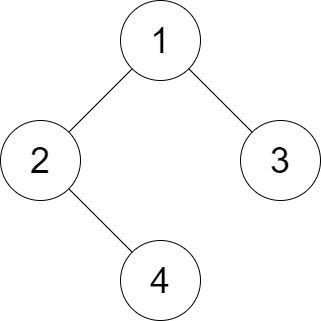
- Input: root = [1,2,3,null,4], distance = 3
- Output: 1
- Explanation: The leaf nodes of the tree are 3 and 4 and the length of the shortest path between them is 3. This is the only good pair.

### Exmalple 2:
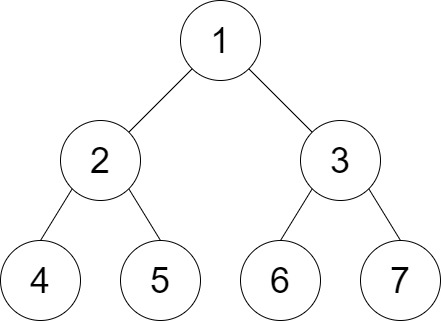
- Input: root = [1,2,3,4,5,6,7], distance = 3
- Output: 2
- Explanation: The good pairs are [4,5] and [6,7] with shortest path = 2. The pair [4,6] is not good because the length of ther shortest path between them is 4.

### Example 3:
- Input: root = [7,1,4,6,null,5,3,null,null,null,null,null,2], distance = 3
- Output: 1
- Explanation: The only good pair is [2,5].

# Constraints:
- The number of nodes in the tree is in the range [1, 2^10].
- 1 <= Node.val <= 100
- 1 <= distance <= 10

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def countPairs(self, root: TreeNode, distance: int) -> int:
        def dfs(node: TreeNode, distance: int, count: int) -> list[int]:  
            if not node:  
                return []  
  
            if not node.left and not node.right:  
                return [1]  
  
            left_distances = dfs(node.left, distance, count)  
            right_distances = dfs(node.right, distance, count)  
  
            for l in left_distances:  
                for r in right_distances:  
                    if l + r <= distance:  
                        count[0] += 1  
  
            result = []  
            for l in left_distances:  
                if l + 1 < distance:  
                    result.append(l + 1)  
            for r in right_distances:  
                if r + 1 < distance:  
                    result.append(r + 1)  
  
            return result  
  
        count = [0]  # Using a list to pass mutable integer by reference  
        dfs(root, distance, count)  
        return count[0]

In [ ]:
/**
 * Definition for a binary tree node.
 * struct TreeNode {
 *     int val;
 *     TreeNode *left;
 *     TreeNode *right;
 *     TreeNode() : val(0), left(nullptr), right(nullptr) {}
 *     TreeNode(int x) : val(x), left(nullptr), right(nullptr) {}
 *     TreeNode(int x, TreeNode *left, TreeNode *right) : val(x), left(left), right(right) {}
 * };
 */
class Solution {
public:
    int countPairs(TreeNode* root, int distance) {
         int count = 0;
        dfs(root, distance, count);
        return count;
    }
    
private:
    vector<int> dfs(TreeNode* node, int distance, int& count) {
        if (!node) return {};
        
        if (!node->left && !node->right) {
            // Leaf node, return a vector with a single element 1 (distance from leaf to itself)
            return {1};
        }
        
        vector<int> leftDistances = dfs(node->left, distance, count);
        vector<int> rightDistances = dfs(node->right, distance, count);
        
        // Count pairs between left and right distances
        for (int l : leftDistances) {
            for (int r : rightDistances) {
                if (l + r <= distance) {
                    count++;
                }
            }
        }
        
        // Prepare distances to return to the parent node
        vector<int> result;
        for (int l : leftDistances) {
            if (l + 1 < distance) {
                result.push_back(l + 1);
            }
        }
        for (int r : rightDistances) {
            if (r + 1 < distance) {
                result.push_back(r + 1);
            }
        }
        
        return result;
    }
};